In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split

from sklearn import preprocessing

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
df=pd.read_excel('/content/sample_data.xlsx')

In [ ]:
df.head(10)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q45,Q46,Q47,Q48,Q49,Q50,Age,Gender,w_f_y,profession
0,1,2,1,3,1,2,1,1,1,1,...,1,1,1,1,1,1,40,Male,Yes,Salaried position - Full-time
1,1,1,1,4,1,4,2,3,1,1,...,1,3,1,4,1,1,45,Male,Yes,Self-employed
2,1,1,2,3,2,1,2,2,1,1,...,1,2,2,1,2,2,42,Female,Yes,Professional
3,2,2,1,4,1,3,1,3,1,2,...,2,2,2,2,1,2,39,Female,No,Salaried position - Full-time
4,1,2,1,4,2,3,1,3,1,1,...,1,3,1,4,1,1,41,Male,No,Professional
5,2,2,1,4,2,4,1,1,2,2,...,2,3,2,4,2,2,44,Male,No,Salaried position - Full-time
6,1,1,2,3,2,1,2,2,2,1,...,1,2,2,1,2,2,42,Female,Yes,Professional
7,2,1,1,4,2,4,2,3,2,1,...,2,3,1,4,2,1,32,Male,Yes,Salaried position - Full-time
8,2,2,1,3,2,2,1,1,2,1,...,2,1,1,1,2,1,40,Female,Yes,Upper management
9,1,1,1,4,1,4,2,3,1,1,...,1,3,1,4,1,1,45,Male,Yes,Self-employed


In [ ]:
df.columns

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31',
       'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41',
       'Q42', 'Q43', 'Q44', 'Q45', 'Q46', 'Q47', 'Q48', 'Q49', 'Q50', 'Age',
       'Gender', 'w_f_y', 'profession'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 54 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Q1          82 non-null     int64 
 1   Q2          82 non-null     int64 
 2   Q3          82 non-null     int64 
 3   Q4          82 non-null     int64 
 4   Q5          82 non-null     int64 
 5   Q6          82 non-null     int64 
 6   Q7          82 non-null     int64 
 7   Q8          82 non-null     int64 
 8   Q9          82 non-null     int64 
 9   Q10         82 non-null     int64 
 10  Q11         82 non-null     int64 
 11  Q12         82 non-null     int64 
 12  Q13         82 non-null     int64 
 13  Q14         82 non-null     int64 
 14  Q15         82 non-null     int64 
 15  Q16         82 non-null     int64 
 16  Q17         82 non-null     int64 
 17  Q18         82 non-null     int64 
 18  Q19         82 non-null     int64 
 19  Q20         82 non-null     int64 
 20  Q21         

In [ ]:
df.shape

(82, 54)

In [ ]:
df.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q42,Q43,Q44,Q45,Q46,Q47,Q48,Q49,Q50,Age
count,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,...,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000
mean,1.329268,1.609756,1.414634,3.292683,1.414634,2.621951,1.548780,2.195122,1.292683,1.317073,...,2.414634,1.292683,1.243902,1.365854,2.170732,1.317073,2.536585,1.365854,1.463415,41.195122
std,0.472840,0.623730,0.565494,0.808715,0.495691,1.095899,0.547778,0.999247,0.457794,0.468200,...,1.351279,0.598100,0.485874,0.484633,1.040001,0.468200,1.335139,0.533153,0.706148,5.614002
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,25.000000
25%,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,39.000000
50%,1.000000,2.000000,1.000000,3.000000,1.000000,3.000000,2.000000,2.000000,1.000000,1.000000,...,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,42.000000
75%,2.000000,2.000000,2.000000,4.000000,2.000000,4.000000,2.000000,3.000000,2.000000,2.000000,...,4.000000,1.000000,1.000000,2.000000,3.000000,2.000000,4.000000,2.000000,2.000000,45.000000
max,2.000000,3.000000,3.000000,4.000000,2.000000,4.000000,3.000000,4.000000,2.000000,2.000000,...,4.000000,4.000000,3.000000,2.000000,4.000000,2.000000,4.000000,3.000000,4.000000,50.000000


In [ ]:
df.isnull()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q45,Q46,Q47,Q48,Q49,Q50,Age,Gender,w_f_y,profession
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
78,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
79,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
80,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.drop(['profession'], axis=1,inplace=True)

In [ ]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df['w_f_y']= label_encoder.fit_transform(df['w_f_y'])
print(df["w_f_y"].unique())
#df["w_f_y"].unique()
print(df['Gender'].unique())
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Gender'].unique()

w_f_y
Gender


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 53 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Q1      82 non-null     int64
 1   Q2      82 non-null     int64
 2   Q3      82 non-null     int64
 3   Q4      82 non-null     int64
 4   Q5      82 non-null     int64
 5   Q6      82 non-null     int64
 6   Q7      82 non-null     int64
 7   Q8      82 non-null     int64
 8   Q9      82 non-null     int64
 9   Q10     82 non-null     int64
 10  Q11     82 non-null     int64
 11  Q12     82 non-null     int64
 12  Q13     82 non-null     int64
 13  Q14     82 non-null     int64
 14  Q15     82 non-null     int64
 15  Q16     82 non-null     int64
 16  Q17     82 non-null     int64
 17  Q18     82 non-null     int64
 18  Q19     82 non-null     int64
 19  Q20     82 non-null     int64
 20  Q21     82 non-null     int64
 21  Q22     82 non-null     int64
 22  Q23     82 non-null     int64
 23  Q24     82 non-nu

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


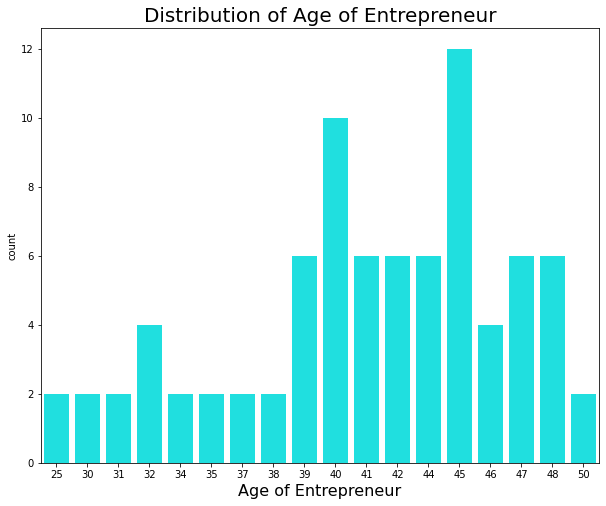

In [ ]:
x = df['Age']
plt.figure(figsize=(10,8))
ax = sns.countplot(x, color = '#00ffff')
ax.set_xlabel(xlabel = 'Age of Entrepreneur', fontsize = 16)
ax.set_title(label = 'Distribution of Age of Entrepreneur', fontsize = 20)
plt.show()

In [ ]:
sns.pairplot(data=df)
plt.show()

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

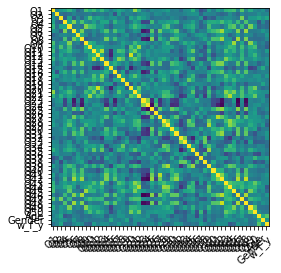

<Figure size 1440x2160 with 0 Axes>

In [ ]:
corr = df.corr()
fig, ax = plt.subplots()
# create heatmap
im = ax.imshow(corr.values)

# set labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

In [ ]:
train, test = train_test_split(df, test_size = 0.2)
print(train.shape)
print(test.shape)

(65, 54)
(17, 54)


In [ ]:
train_X = train[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
                 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
                 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31',
                 'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41',
                 'Q42', 'Q43', 'Q44', 'Q45', 'Q46', 'Q47', 'Q48', 'Q49', 'Q50', 'Age', 'Gender']]
train_y = train.w_f_y

train_X = train[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
                 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
                 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31',
                 'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41',
                 'Q42', 'Q43', 'Q44', 'Q45', 'Q46', 'Q47', 'Q48', 'Q49', 'Q50', 'Age', 'Gender']]
test_y = test.w_f_y

In [ ]:
test_y

1     1
71    0
77    1
76    1
32    1
34    0
13    1
19    0
27    1
51    0
12    1
45    0
39    1
69    0
49    1
9     1
31    1
Name: w_f_y, dtype: int64

In [ ]:
train_X

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q43,Q44,Q45,Q46,Q47,Q48,Q49,Q50,Age,Gender
48,2,1,1,4,2,4,2,3,2,1,...,1,1,2,3,1,4,2,1,32,1
18,1,1,1,2,1,1,2,2,1,1,...,1,1,1,1,1,1,1,1,39,0
10,1,2,1,4,1,3,2,3,1,2,...,1,1,1,2,1,4,1,2,25,0
53,1,1,1,3,1,3,2,4,1,1,...,2,1,1,4,1,3,1,1,45,0
68,1,1,1,4,1,4,2,3,1,1,...,4,2,2,4,1,4,2,4,46,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,1,2,1,3,1,2,1,1,1,1,...,1,1,1,1,1,1,1,1,40,0
4,1,2,1,4,2,3,1,3,1,1,...,1,3,1,3,1,4,1,1,41,1
40,1,2,2,4,1,4,2,3,1,1,...,1,1,1,3,1,4,1,1,45,1
50,1,1,1,4,1,4,1,3,1,1,...,1,1,1,3,1,4,1,1,45,1


In [ ]:
train_y

48    1
18    0
10    0
53    1
68    1
     ..
25    1
4     0
40    1
50    1
54    1
Name: w_f_y, Length: 65, dtype: int64

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
grid = {'n_neighbors': np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid, cv=3) # GridSearchCV
knn_cv.fit(train_X,train_y)# Fit

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py", line 214, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py", line 729, in kneighbors
    " but n_samples = %d, n_neighbors = %d

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [ ]:
print("Tuned hyperparameter k: {}".format(knn_cv.best_params_)) 
print("Best score: {}".format(knn_cv.best_score_))

Tuned hyperparameter k: {'n_neighbors': 12}
Best score: 0.7857142857142857


In [ ]:
from sklearn.linear_model import LogisticRegression
# grid search cross validation with 2 hyperparameter
# 1. hyperparameter is C:logistic regression regularization parameter
# 2. penalty l1 or l2
# Hyperparameter grid
param_grid = {'C': np.logspace(-3, 3, 7), 'penalty': ['l1', 'l2']}
x_train, x_test, y_train, y_test = train_test_split(train_X,train_y,test_size = 0.3,random_state = 12)
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg,param_grid,cv=3)
logreg_cv.fit(x_train,y_train)

# Print the optimal parameters and best score
print("Tuned hyperparameters : {}".format(logreg_cv.best_params_))
print("Best Accuracy: {}".format(logreg_cv.best_score_))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Tuned hyperparameters : {'C': 0.01, 'penalty': 'l2'}
Best Accuracy: 0.7555555555555555


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
# SVM, pre-process and pipeline
steps = [('scalar', StandardScaler()),
         ('SVM', SVC())]
pipeline = Pipeline(steps)
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}
x_train, x_test, y_train, y_test = train_test_split(train_X,train_y,test_size=0.2,random_state = 1)
cv = GridSearchCV(pipeline,param_grid=parameters,cv=3)
cv.fit(x_train,y_train)

y_pred = cv.predict(x_test)

print("Accuracy: {}".format(cv.score(x_test, y_test)))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.8461538461538461
Tuned Model Parameters: {'SVM__C': 10, 'SVM__gamma': 0.1}


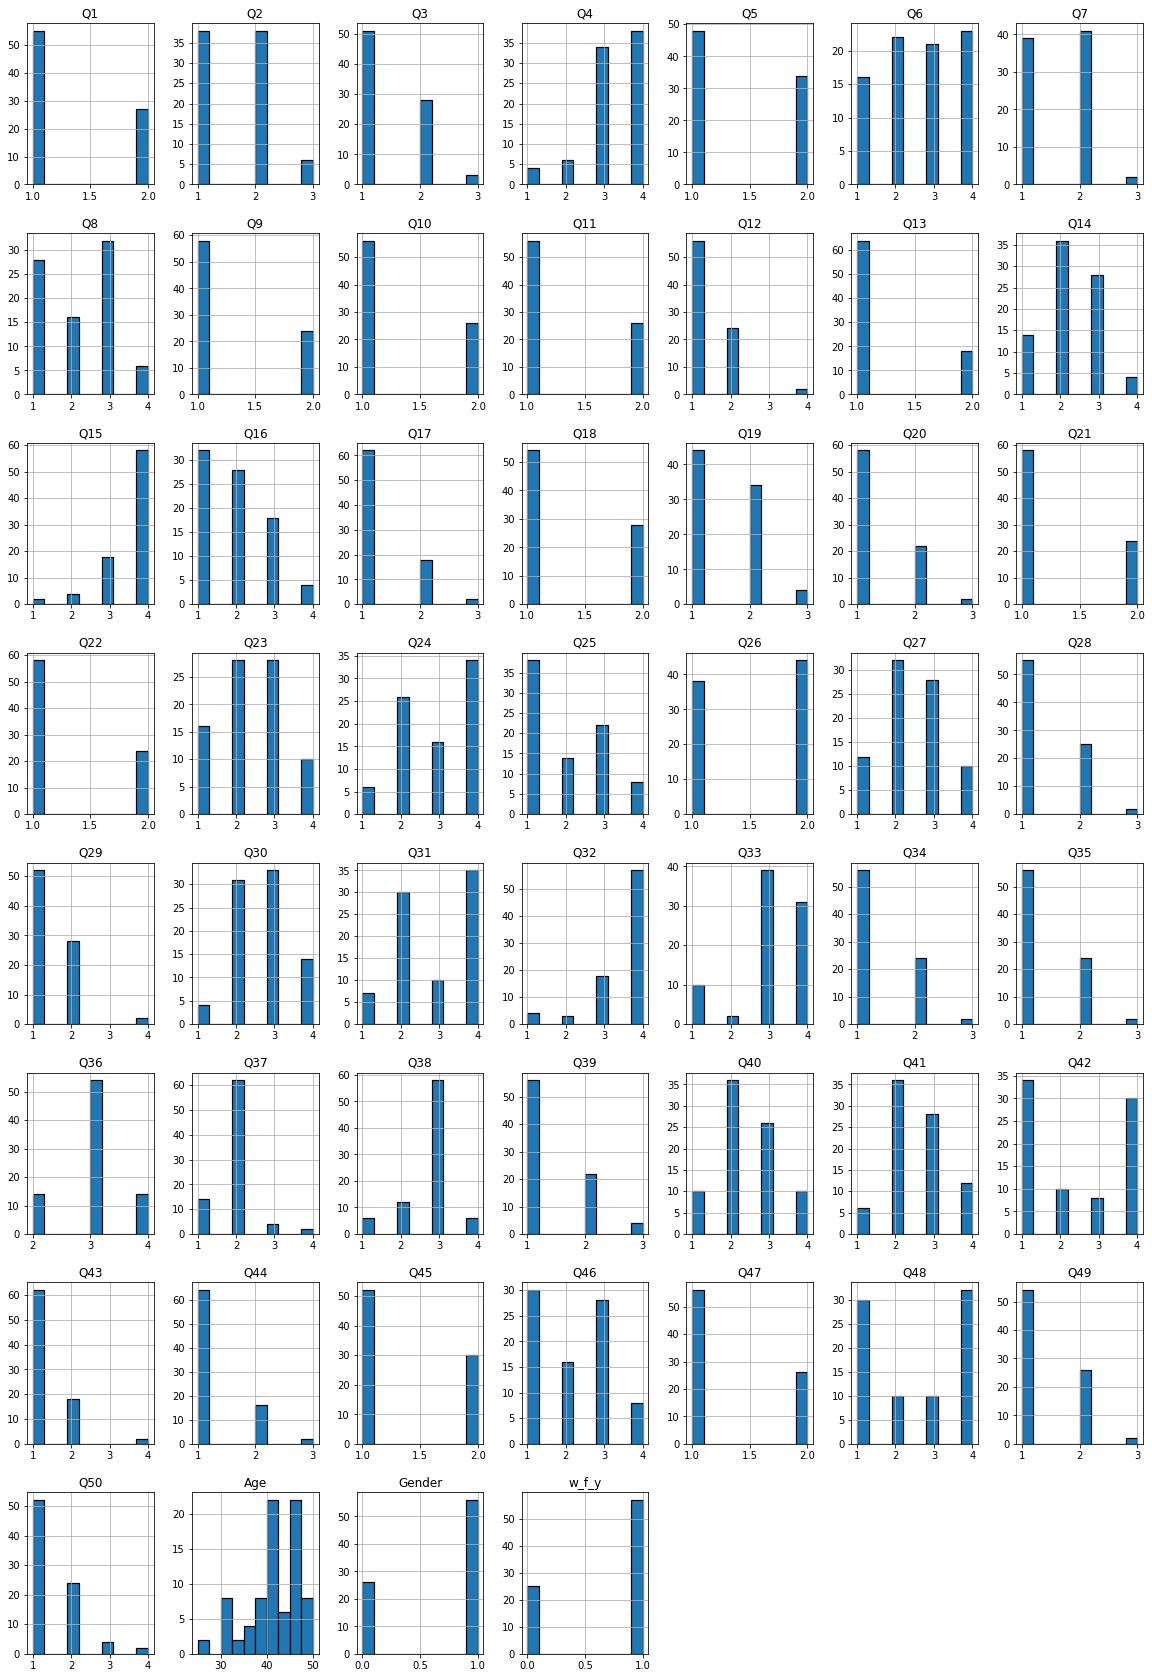

In [ ]:
df.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(20, 30)
plt.show()